# Ficha #05 - Criação automática das máscaras do dataset DRIVE

**Objectivo**: Neste trabalho usando as técnicas que julgar mais adequadas deve gerar automaticamente as máscaras do conjunto de imagens do DRIVE. A máscara permite extrair a zona central de interesse da image de fundo de olho. Na validação do seu trabalho deve sobrepor vários perfis de intensidade da máscara e da imagem de fundo de olho na direcção horizontal como na vertical.

In [11]:
%pylab inline
import sys
sys.path.append('/usr/lib/python3.6/site-packages')
import cv2
import scipy.ndimage
import numpy as np



Populating the interactive namespace from numpy and matplotlib


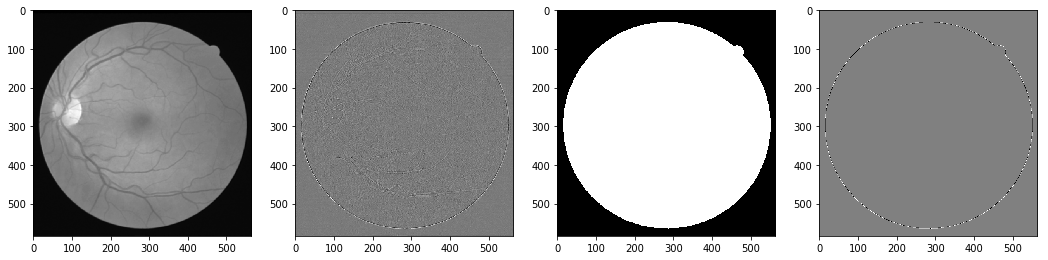

In [63]:
path = "DRIVE/test/images/"
img = cv2.imread(path+"01_test.tif",0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)

blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

tmp = cv2.Laplacian(th3,cv2.CV_64F)

_,ax=subplots(1,5,figsize=(18,6))
ax[0].imshow(blur)
ax[1].imshow(laplacian)
ax[2].imshow(th3)
ax[3].imshow(tmp)